In [994]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [995]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [996]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [997]:
test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [998]:
train.shape , test.shape

((8693, 14), (4277, 13))

In [999]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1000]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1001]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [1002]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

## Dropping the all missing values

In [1003]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [1004]:
test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [1005]:
count=0
index=[]
for i in range(8693):
    if train.loc[i].isnull().sum() ==0:
        pass
    else : 
        count = count+1
        index.append(i)

In [1006]:
count

1929

In [1007]:
index

[7,
 10,
 15,
 16,
 23,
 25,
 28,
 35,
 38,
 40,
 47,
 48,
 50,
 59,
 64,
 83,
 86,
 92,
 93,
 95,
 98,
 102,
 103,
 104,
 111,
 113,
 115,
 122,
 128,
 132,
 137,
 139,
 143,
 145,
 152,
 170,
 175,
 181,
 184,
 186,
 199,
 218,
 220,
 222,
 224,
 225,
 227,
 228,
 233,
 234,
 239,
 245,
 249,
 251,
 260,
 266,
 269,
 272,
 274,
 280,
 282,
 286,
 287,
 288,
 289,
 290,
 291,
 295,
 306,
 314,
 317,
 319,
 325,
 344,
 346,
 347,
 365,
 367,
 368,
 381,
 385,
 392,
 400,
 401,
 405,
 407,
 415,
 417,
 430,
 431,
 434,
 436,
 437,
 438,
 444,
 448,
 453,
 454,
 456,
 457,
 461,
 462,
 468,
 471,
 480,
 481,
 482,
 483,
 484,
 487,
 488,
 493,
 499,
 501,
 505,
 524,
 529,
 533,
 534,
 540,
 545,
 547,
 550,
 566,
 568,
 569,
 570,
 572,
 574,
 582,
 583,
 584,
 586,
 587,
 590,
 596,
 611,
 620,
 626,
 631,
 637,
 646,
 649,
 652,
 657,
 665,
 669,
 676,
 678,
 679,
 681,
 682,
 686,
 691,
 699,
 703,
 704,
 711,
 713,
 714,
 717,
 719,
 721,
 723,
 726,
 729,
 730,
 737,
 742,
 748,
 7

In [1008]:
count_test=0
index_test=[]
for i in range(4277):
    if test.loc[i].isnull().sum() ==0:
        pass
    else : 
        count_test = count_test+1
        index_test.append(i)

In [1009]:
count_test

922

In [1010]:
1929/8693

0.22190268031749683

In [1011]:
922/4277

0.21557166238017303

In [1012]:
train.dropna(inplace=True)

In [1013]:
train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0      0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1      0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2      0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3      0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4      0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5      0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6      0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
8      0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9      0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
11     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   

    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0           0.0        0.0           0.0     0.0     0.0        False  
1         109.0        9.0          25.0   549.0    44.0         True  
2          43.0     3576.0           0.0  6715.0    49.0        False  
3           0.0     1283.0         371.0  3329.0   193.0        False  
4         303.0       70.0         151.0   565.0     2.0         True  
5           0.0      483.0           0.0   291.0     0.0         True  
6          42.0     1539.0           3.0     0.0     0.0         True  
8           0.0      785.0          17.0   216.0     0.0         True  
9           0.0        0.0           0.0     0.0     0.0         True  
11         39.0     7295.0         589.0   110.0   124.0         True

In [1014]:
train.reset_index(inplace=True,)

In [1015]:
train.head(10)

index PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0      0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1      1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2      2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3      3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4      4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5      5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6      6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7      8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
8      9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
9     11     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0        False  
1        109.0        9.0          25.0   549.0    44.0         True  
2         43.0     3576.0           0.0  6715.0    49.0        False  
3          0.0     1283.0         371.0  3329.0   193.0        False  
4        303.0       70.0         151.0   565.0     2.0         True  
5          0.0      483.0           0.0   291.0     0.0         True  
6         42.0     1539.0           3.0     0.0     0.0         True  
7          0.0      785.0          17.0   216.0     0.0         True  
8          0.0        0.0           0.0     0.0     0.0         True  
9         39.0     7295.0         589.0   110.0   124.0         True

In [1016]:
train.drop('index',axis=1,inplace=True)

In [1017]:
train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
8     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
9     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0        False  
1        109.0        9.0          25.0   549.0    44.0         True  
2         43.0     3576.0           0.0  6715.0    49.0        False  
3          0.0     1283.0         371.0  3329.0   193.0        False  
4        303.0       70.0         151.0   565.0     2.0         True  
5          0.0      483.0           0.0   291.0     0.0         True  
6         42.0     1539.0           3.0     0.0     0.0         True  
7          0.0      785.0          17.0   216.0     0.0         True  
8          0.0        0.0           0.0     0.0     0.0         True  
9         39.0     7295.0         589.0   110.0   124.0         True

In [1018]:
test.dropna(inplace=True)

In [1019]:
test.reset_index(inplace=True)

In [1020]:
test.drop('index',axis=1,inplace=True)

In [1021]:
test.head(15)

PassengerId HomePlanet CryoSleep   Cabin  Destination   Age    VIP  \
0      0013_01      Earth      True   G/3/S  TRAPPIST-1e  27.0  False   
1      0018_01      Earth     False   F/4/S  TRAPPIST-1e  19.0  False   
2      0019_01     Europa      True   C/0/S  55 Cancri e  31.0  False   
3      0021_01     Europa     False   C/1/S  TRAPPIST-1e  38.0  False   
4      0023_01      Earth     False   F/5/S  TRAPPIST-1e  20.0  False   
5      0027_01      Earth     False   F/7/P  TRAPPIST-1e  31.0  False   
6      0032_01     Europa      True   D/0/S  TRAPPIST-1e  20.0  False   
7      0032_02     Europa      True   D/0/S  55 Cancri e  23.0  False   
8      0033_01      Earth     False   F/7/S  55 Cancri e  24.0  False   
9      0037_01      Earth     False   F/9/S  TRAPPIST-1e  19.0  False   
10     0040_02     Europa     False   D/2/P  TRAPPIST-1e  44.0  False   
11     0042_01       Mars      True   E/0/P  TRAPPIST-1e  46.0  False   
12     0046_01      Earth     False   G/4/P  TRAPPIST-1e  21.0  False   
13     0046_03      Earth     False  F/11/P  TRAPPIST-1e  20.0  False   
14     0047_01     Europa      True   B/0/S  TRAPPIST-1e  44.0  False   

    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0        0.0           0.0     0.0     0.0  
1           0.0        9.0           0.0  2823.0     0.0  
2           0.0        0.0           0.0     0.0     0.0  
3           0.0     6652.0           0.0   181.0   585.0  
4          10.0        0.0         635.0     0.0     0.0  
5           0.0     1615.0         263.0   113.0    60.0  
6           0.0        0.0           0.0     0.0     0.0  
7           0.0        0.0           0.0     0.0     0.0  
8           0.0      639.0           0.0     0.0     0.0  
9         339.0        3.0         136.0   237.0     0.0  
10          0.0     1561.0           0.0    14.0   224.0  
11          0.0        0.0           0.0     0.0     0.0  
12          0.0        0.0           0.0  1687.0    92.0  
13          2.0       12.0         253.0   457.0   690.0  
14          0.0        0.0           0.0     0.0     0.0

In [1022]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [1023]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1024]:
train.shape , test.shape

((6764, 13), (3355, 12))

## Outliers Checking 

<AxesSubplot: >

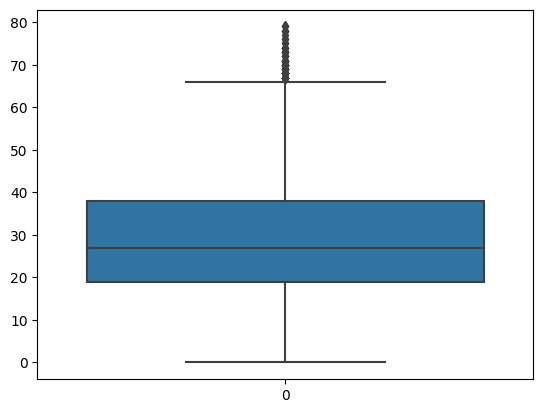

In [1025]:
sns.boxplot(train['Age'])

In [1026]:
percentile25=train['Age'].quantile(0.25)
percentile75=train['Age'].quantile(0.75)

iqr = percentile75-percentile25

upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)

In [1027]:
train[train['Age'] > upper_limit]

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
91       0126_01       Mars      True    F/27/S    TRAPPIST-1e  67.0  False   
265      0378_03     Europa     False    B/11/S    TRAPPIST-1e  79.0  False   
299      0417_01     Europa      True    B/18/P    55 Cancri e  68.0  False   
329      0453_03     Europa      True    B/14/S    TRAPPIST-1e  74.0  False   
478      0642_03     Europa     False    C/25/S    TRAPPIST-1e  79.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
6000     8248_02      Earth     False  G/1339/P  PSO J318.5-22  72.0  False   
6247     8605_01     Europa     False   C/324/S    TRAPPIST-1e  67.0  False   
6447     8852_01       Mars      True   D/278/P    TRAPPIST-1e  76.0  False   
6511     8954_01      Earth     False  G/1452/P  PSO J318.5-22  73.0  False   
6623     9085_01     Europa     False    A/95/P    55 Cancri e  70.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
91            0.0        0.0           0.0     0.0     0.0         True  
265        5649.0      235.0           7.0  2579.0  2175.0        False  
299           0.0        0.0           0.0     0.0     0.0         True  
329           0.0        0.0           0.0     0.0     0.0         True  
478           0.0        0.0           0.0  2210.0     2.0        False  
...           ...        ...           ...     ...     ...          ...  
6000        309.0        0.0           0.0     0.0   463.0        False  
6247          0.0       82.0           0.0  2279.0   293.0        False  
6447          0.0        0.0           0.0     0.0     0.0         True  
6511       1806.0        0.0          47.0     0.0     0.0        False  
6623          0.0     2113.0           0.0  1972.0    51.0        False  

[64 rows x 13 columns]

In [1028]:
train[train['Age'] < lower_limit]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported]
Index: []

In [1029]:
train_index= list(range(0,6764))
train_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [1030]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1031]:
train.head(10)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
8     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
9     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0          0.0        0.0           0.0     0.0     0.0        False  
1        109.0        9.0          25.0   549.0    44.0         True  
2         43.0     3576.0           0.0  6715.0    49.0        False  
3          0.0     1283.0         371.0  3329.0   193.0        False  
4        303.0       70.0         151.0   565.0     2.0         True  
5          0.0      483.0           0.0   291.0     0.0         True  
6         42.0     1539.0           3.0     0.0     0.0         True  
7          0.0      785.0          17.0   216.0     0.0         True  
8          0.0        0.0           0.0     0.0     0.0         True  
9         39.0     7295.0         589.0   110.0   124.0         True

In [1032]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1033]:
for i in range(1,6764):
    if train['Age'][i] > upper_limit:
        train['Age'][i] = upper_limit
    else :
        if train['Age'][i] <lower_limit:
            train['Age'][i] = lower_limit
        else :
            train['Age'][i]=train['Age'][i]

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\294993283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i]=train['Age'][i]
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\294993283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = upper_limit


C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

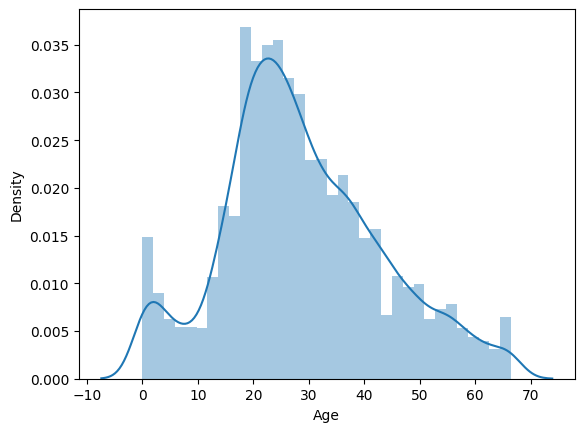

In [1034]:
sns.distplot(train['Age'])

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

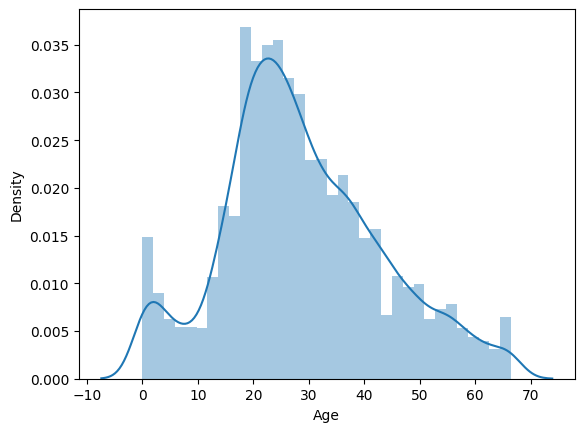

In [1035]:
sns.distplot(train['Age'])

<AxesSubplot: >

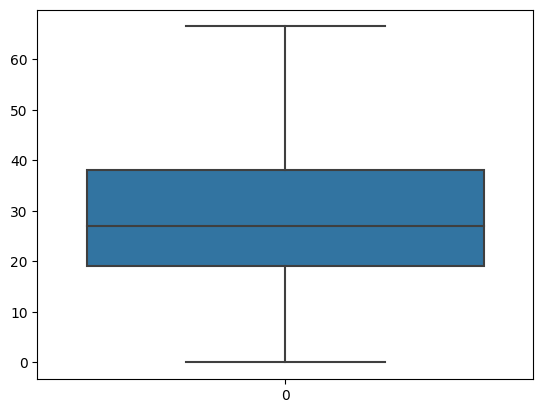

In [1036]:
sns.boxplot(train['Age'])

In [1037]:
upper_limit , lower_limit

(66.5, -9.5)

In [1038]:
for i in range(1,3355):
    if test['Age'][i] > upper_limit:
        test['Age'][i] = upper_limit
    else :
        if test['Age'][i] <lower_limit:
            test['Age'][i] = lower_limit
        else :
            test['Age'][i]=test['Age'][i]

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\1296310990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i]=test['Age'][i]
C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\1296310990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = upper_limit


<AxesSubplot: >

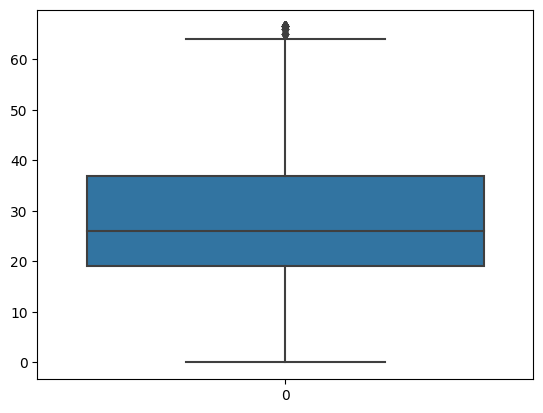

In [1039]:
sns.boxplot(test['Age'])

<AxesSubplot: >

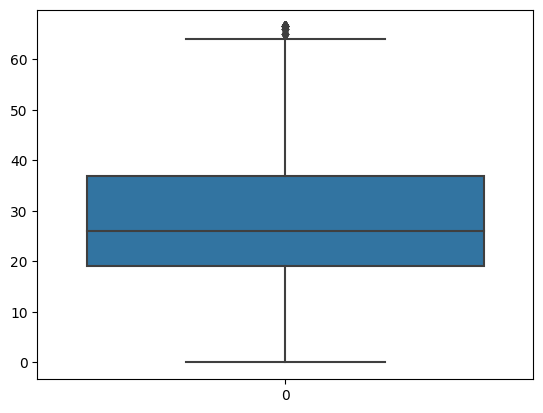

In [1040]:
sns.boxplot(test['Age'])

## data scaling

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\3916595873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['RoomService'])


<AxesSubplot: xlabel='RoomService', ylabel='Density'>

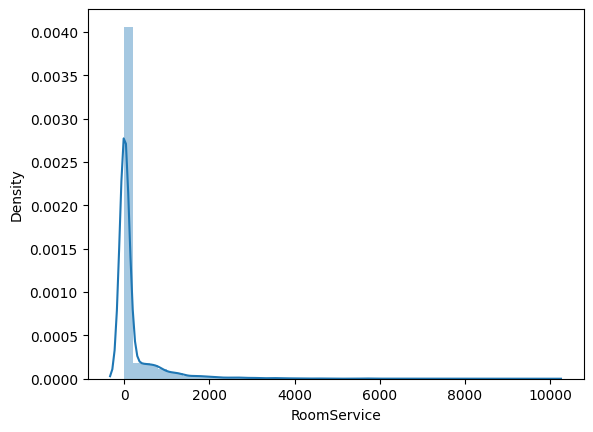

In [1041]:
sns.distplot(train['RoomService'])

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\262844118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['FoodCourt'])


<AxesSubplot: xlabel='FoodCourt', ylabel='Density'>

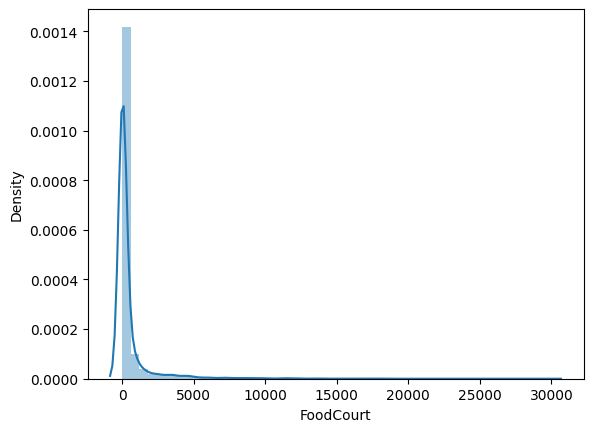

In [1042]:
sns.distplot(train['FoodCourt'])

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\3894393122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CryoSleep'])


<AxesSubplot: xlabel='CryoSleep', ylabel='Density'>

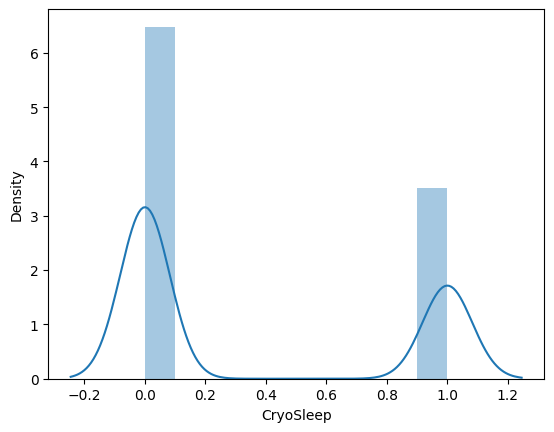

In [1043]:
sns.distplot(train['CryoSleep'])

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\2462100606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ShoppingMall'])


<AxesSubplot: xlabel='ShoppingMall', ylabel='Density'>

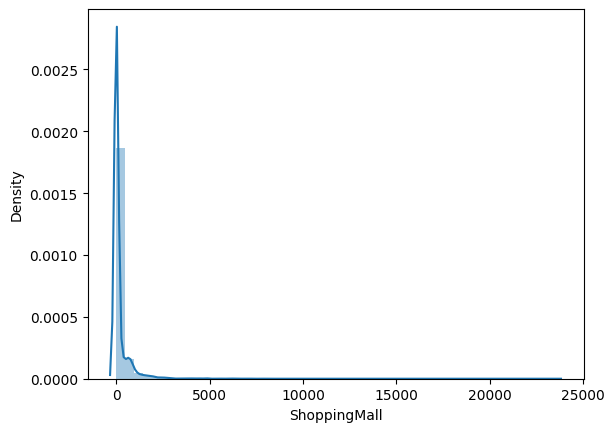

In [1044]:
sns.distplot(train['ShoppingMall'])

In [1045]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1046]:
from sklearn.preprocessing import MinMaxScaler

In [1047]:
scalar = MinMaxScaler()

In [1048]:
new_train = train.copy()

In [1049]:
new_train.sample()

PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
4664     6372_03     Europa     False  B/216/P  55 Cancri e  45.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  Transported  
4664          0.0     3200.0           0.0  415.0   161.0         True

In [1050]:
new_train.drop(columns=['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Transported'],inplace=True)

In [1051]:
new_train.drop('Age',axis=1,inplace=True)

In [1052]:
new_train.sample()

RoomService  FoodCourt  ShoppingMall    Spa  VRDeck
3838         89.0        3.0         571.0  258.0     0.0

In [1053]:
new_train = scalar.fit_transform(new_train)

In [1054]:
trf_train = pd.DataFrame(new_train,columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [1055]:
trf_train.head()

RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0     0.000000   0.000000      0.000000  0.000000  0.000000
1     0.010988   0.000302      0.001064  0.024500  0.002164
2     0.004335   0.119948      0.000000  0.299670  0.002410
3     0.000000   0.043035      0.015793  0.148563  0.009491
4     0.030544   0.002348      0.006428  0.025214  0.000098

In [1056]:
trf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   6764 non-null   float64
 1   FoodCourt     6764 non-null   float64
 2   ShoppingMall  6764 non-null   float64
 3   Spa           6764 non-null   float64
 4   VRDeck        6764 non-null   float64
dtypes: float64(5)
memory usage: 264.3 KB


In [1057]:
temp_train = train.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [1058]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [1059]:
temp_train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
6759     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
6760     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
6761     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
6762     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
6763     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
6759        False  
6760        False  
6761         True  
6762        False  
6763         True  

[6764 rows x 8 columns]

In [1060]:
temp_train.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [1061]:
trf_train = pd.concat([temp_train,trf_train],axis=1)

In [1062]:
trf_train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
6759     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
6760     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
6761     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
6762     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
6763     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      Transported  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0           False     0.000000   0.000000      0.000000  0.000000  0.000000  
1            True     0.010988   0.000302      0.001064  0.024500  0.002164  
2           False     0.004335   0.119948      0.000000  0.299670  0.002410  
3           False     0.000000   0.043035      0.015793  0.148563  0.009491  
4            True     0.030544   0.002348      0.006428  0.025214  0.000098  
...           ...          ...        ...           ...       ...       ...  
6759        False     0.000000   0.228726      0.000000  0.073322  0.003639  
6760        False     0.000000   0.000000      0.000000  0.000000  0.000000  
6761         True     0.000000   0.000000      0.079687  0.000045  0.000000  
6762        False     0.000000   0.035186      0.000000  0.015753  0.159077  
6763         True     0.012702   0.157247      0.000000  0.000000  0.000590  

[6764 rows x 13 columns]

In [1063]:
trf_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
Transported     0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [1064]:
trf_train['RoomService']= trf_train['RoomService'].fillna(0)

In [1065]:
trf_train['VRDeck']= trf_train['VRDeck'].fillna(0)
trf_train['FoodCourt']= trf_train['FoodCourt'].fillna(0)
trf_train['ShoppingMall']= trf_train['ShoppingMall'].fillna(0)
trf_train['Spa']= trf_train['Spa'].fillna(0)

In [1066]:
trf_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
Transported     0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [1067]:
new_test = test.copy()

In [1068]:
new_test.drop(columns=['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP'],inplace=True)

In [1069]:
new_test.drop('Age',axis=1,inplace=True)

In [1070]:
new_test = scalar.fit_transform(new_test)

In [1071]:
trf_test = pd.DataFrame(new_test,columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [1072]:
temp_test = test.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])

In [1073]:
trf_test = pd.concat([temp_test,trf_test],axis=1)

In [1074]:
trf_test['VRDeck']= trf_test['VRDeck'].fillna(0)
trf_test['FoodCourt']= trf_test['FoodCourt'].fillna(0)
trf_test['ShoppingMall']= trf_test['ShoppingMall'].fillna(0)
trf_test['Spa']= trf_test['Spa'].fillna(0)
trf_test['RoomService']= trf_test['RoomService'].fillna(0)

In [1075]:
trf_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0     0.000000   0.000000       0.00000  0.000000  0.000000  
1     0.000000   0.000433       0.00000  0.179432  0.000000  
2     0.000000   0.000000       0.00000  0.000000  0.000000  
3     0.000000   0.319669       0.00000  0.011504  0.030651  
4     0.000865   0.000000       0.07658  0.000000  0.000000

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12236\2054797002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trf_train['RoomService'])


<AxesSubplot: xlabel='RoomService', ylabel='Density'>

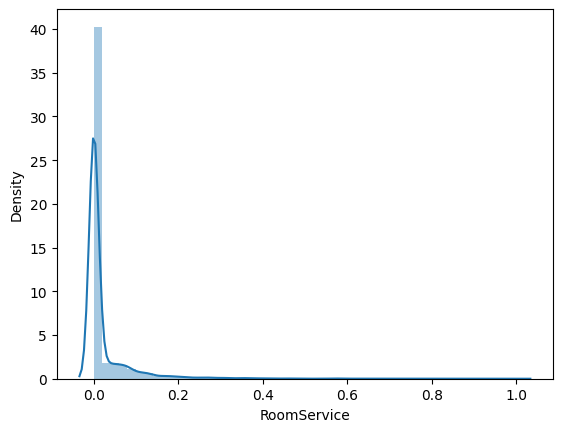

In [1076]:
sns.distplot(trf_train['RoomService'])

## Label Encoding

In [1077]:
trf_train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   Transported  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0        False     0.000000   0.000000      0.000000  0.000000  0.000000  
1         True     0.010988   0.000302      0.001064  0.024500  0.002164  
2        False     0.004335   0.119948      0.000000  0.299670  0.002410  
3        False     0.000000   0.043035      0.015793  0.148563  0.009491  
4         True     0.030544   0.002348      0.006428  0.025214  0.000098

In [1078]:
from sklearn.compose import ColumnTransformer

In [1079]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

In [1080]:
trf_train['Destination'].value_counts()

TRAPPIST-1e      4682
55 Cancri e      1442
PSO J318.5-22     640
Name: Destination, dtype: int64

In [1081]:
ct = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['HomePlanet'])
],remainder='passthrough')

In [1082]:
ct.set_output(transform='pandas')
trf_train = ct.fit_transform(trf_train)

In [1083]:
trf_train.head()

tnf1__HomePlanet_Europa  tnf1__HomePlanet_Mars remainder__PassengerId  \
0                      1.0                    0.0                0001_01   
1                      0.0                    0.0                0002_01   
2                      1.0                    0.0                0003_01   
3                      1.0                    0.0                0003_02   
4                      0.0                    0.0                0004_01   

  remainder__CryoSleep remainder__Cabin remainder__Destination  \
0                False            B/0/P            TRAPPIST-1e   
1                False            F/0/S            TRAPPIST-1e   
2                False            A/0/S            TRAPPIST-1e   
3                False            A/0/S            TRAPPIST-1e   
4                False            F/1/S            TRAPPIST-1e   

   remainder__Age remainder__VIP  remainder__Transported  \
0            39.0          False                   False   
1            24.0          False                    True   
2            58.0           True                   False   
3            33.0          False                   False   
4            16.0          False                    True   

   remainder__RoomService  remainder__FoodCourt  remainder__ShoppingMall  \
0                0.000000              0.000000                 0.000000   
1                0.010988              0.000302                 0.001064   
2                0.004335              0.119948                 0.000000   
3                0.000000              0.043035                 0.015793   
4                0.030544              0.002348                 0.006428   

   remainder__Spa  remainder__VRDeck  
0        0.000000           0.000000  
1        0.024500           0.002164  
2        0.299670           0.002410  
3        0.148563           0.009491  
4        0.025214           0.000098

In [1084]:
trf_train.replace({False: 0, True: 1}, inplace=True)

In [1085]:
trf_train.head()

tnf1__HomePlanet_Europa  tnf1__HomePlanet_Mars remainder__PassengerId  \
0                      1.0                    0.0                0001_01   
1                      0.0                    0.0                0002_01   
2                      1.0                    0.0                0003_01   
3                      1.0                    0.0                0003_02   
4                      0.0                    0.0                0004_01   

   remainder__CryoSleep remainder__Cabin remainder__Destination  \
0                     0            B/0/P            TRAPPIST-1e   
1                     0            F/0/S            TRAPPIST-1e   
2                     0            A/0/S            TRAPPIST-1e   
3                     0            A/0/S            TRAPPIST-1e   
4                     0            F/1/S            TRAPPIST-1e   

   remainder__Age  remainder__VIP  remainder__Transported  \
0            39.0               0                       0   
1            24.0               0                       1   
2            58.0               1                       0   
3            33.0               0                       0   
4            16.0               0                       1   

   remainder__RoomService  remainder__FoodCourt  remainder__ShoppingMall  \
0                0.000000              0.000000                 0.000000   
1                0.010988              0.000302                 0.001064   
2                0.004335              0.119948                 0.000000   
3                0.000000              0.043035                 0.015793   
4                0.030544              0.002348                 0.006428   

   remainder__Spa  remainder__VRDeck  
0        0.000000           0.000000  
1        0.024500           0.002164  
2        0.299670           0.002410  
3        0.148563           0.009491  
4        0.025214           0.000098

In [1086]:
trf_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0     0.000000   0.000000       0.00000  0.000000  0.000000  
1     0.000000   0.000433       0.00000  0.179432  0.000000  
2     0.000000   0.000000       0.00000  0.000000  0.000000  
3     0.000000   0.319669       0.00000  0.011504  0.030651  
4     0.000865   0.000000       0.07658  0.000000  0.000000

In [1087]:
trf_test = ct.fit_transform(trf_test)

In [1088]:
trf_test.replace({False: 0, True: 1}, inplace=True)

In [1089]:
trf_test

tnf1__HomePlanet_Europa  tnf1__HomePlanet_Mars remainder__PassengerId  \
0                         0.0                    0.0                0013_01   
1                         0.0                    0.0                0018_01   
2                         1.0                    0.0                0019_01   
3                         1.0                    0.0                0021_01   
4                         0.0                    0.0                0023_01   
...                       ...                    ...                    ...   
3350                      0.0                    0.0                9263_01   
3351                      0.0                    1.0                9265_01   
3352                      0.0                    0.0                9266_01   
3353                      0.0                    0.0                9266_02   
3354                      0.0                    0.0                9277_01   

      remainder__CryoSleep remainder__Cabin remainder__Destination  \
0                        1            G/3/S            TRAPPIST-1e   
1                        0            F/4/S            TRAPPIST-1e   
2                        1            C/0/S            55 Cancri e   
3                        0            C/1/S            TRAPPIST-1e   
4                        0            F/5/S            TRAPPIST-1e   
...                    ...              ...                    ...   
3350                     1         G/1495/S            TRAPPIST-1e   
3351                     0          D/278/S            TRAPPIST-1e   
3352                     0         F/1796/S            TRAPPIST-1e   
3353                     1         G/1496/S            TRAPPIST-1e   
3354                     1         G/1498/S          PSO J318.5-22   

      remainder__Age  remainder__VIP  remainder__RoomService  \
0               27.0               0                0.000000   
1               19.0               0                0.000000   
2               31.0               0                0.000000   
3               38.0               0                0.000000   
4               20.0               0                0.000865   
...              ...             ...                     ...   
3350            43.0               0                0.000000   
3351            43.0               0                0.004063   
3352            40.0               0                0.000000   
3353            34.0               0                0.000000   
3354            43.0               0                0.000000   

      remainder__FoodCourt  remainder__ShoppingMall  remainder__Spa  \
0                 0.000000                 0.000000        0.000000   
1                 0.000433                 0.000000        0.179432   
2                 0.000000                 0.000000        0.000000   
3                 0.319669                 0.000000        0.011504   
4                 0.000000                 0.076580        0.000000   
...                    ...                      ...             ...   
3350              0.000000                 0.000000        0.000000   
3351              0.000000                 0.464424        0.000000   
3352              0.041569                 0.000000        0.000191   
3353              0.000000                 0.000000        0.000000   
3354              0.000000                 0.000000        0.000000   

      remainder__VRDeck  
0              0.000000  
1              0.000000  
2              0.000000  
3              0.030651  
4              0.000000  
...                 ...  
3350           0.000000  
3351           0.000000  
3352           0.000000  
3353           0.000000  
3354           0.000000  

[3355 rows x 13 columns]

In [1090]:
trf_test.isnull().sum()

tnf1__HomePlanet_Europa    0
tnf1__HomePlanet_Mars      0
remainder__PassengerId     0
remainder__CryoSleep       0
remainder__Cabin           0
remainder__Destination     0
remainder__Age             0
remainder__VIP             0
remainder__RoomService     0
remainder__FoodCourt       0
remainder__ShoppingMall    0
remainder__Spa             0
remainder__VRDeck          0
dtype: int64

In [1091]:
trf_train.isnull().sum()

tnf1__HomePlanet_Europa    0
tnf1__HomePlanet_Mars      0
remainder__PassengerId     0
remainder__CryoSleep       0
remainder__Cabin           0
remainder__Destination     0
remainder__Age             0
remainder__VIP             0
remainder__Transported     0
remainder__RoomService     0
remainder__FoodCourt       0
remainder__ShoppingMall    0
remainder__Spa             0
remainder__VRDeck          0
dtype: int64

In [1092]:
trf_train.shape , trf_test.shape

((6764, 14), (3355, 13))

In [1096]:
PassengerId = trf_test['remainder__PassengerId'].values           #### USE FOR SUBMISSION

In [1097]:
PassengerId.shape

(3355,)

In [1099]:
ct1 = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['remainder__Destination'])
],remainder='passthrough')

In [1100]:
ct1.set_output(transform='pandas')
trf_train = ct1.fit_transform(trf_train)

In [1102]:
trf_train.head()

tnf1__remainder__Destination_PSO J318.5-22  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   tnf1__remainder__Destination_TRAPPIST-1e  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   

   remainder__tnf1__HomePlanet_Europa  remainder__tnf1__HomePlanet_Mars  \
0                                 1.0                               0.0   
1                                 0.0                               0.0   
2                                 1.0                               0.0   
3                                 1.0                               0.0   
4                                 0.0                               0.0   

  remainder__remainder__PassengerId  remainder__remainder__CryoSleep  \
0                           0001_01                                0   
1                           0002_01                                0   
2                           0003_01                                0   
3                           0003_02                                0   
4                           0004_01                                0   

  remainder__remainder__Cabin  remainder__remainder__Age  \
0                       B/0/P                       39.0   
1                       F/0/S                       24.0   
2                       A/0/S                       58.0   
3                       A/0/S                       33.0   
4                       F/1/S                       16.0   

   remainder__remainder__VIP  remainder__remainder__Transported  \
0                          0                                  0   
1                          0                                  1   
2                          1                                  0   
3                          0                                  0   
4                          0                                  1   

   remainder__remainder__RoomService  remainder__remainder__FoodCourt  \
0                           0.000000                         0.000000   
1                           0.010988                         0.000302   
2                           0.004335                         0.119948   
3                           0.000000                         0.043035   
4                           0.030544                         0.002348   

   remainder__remainder__ShoppingMall  remainder__remainder__Spa  \
0                            0.000000                   0.000000   
1                            0.001064                   0.024500   
2                            0.000000                   0.299670   
3                            0.015793                   0.148563   
4                            0.006428                   0.025214   

   remainder__remainder__VRDeck  
0                      0.000000  
1                      0.002164  
2                      0.002410  
3                      0.009491  
4                      0.000098

In [1103]:
ct1.set_output(transform='pandas')
trf_test = ct1.fit_transform(trf_test)

In [1104]:
trf_test.head()

tnf1__remainder__Destination_PSO J318.5-22  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   tnf1__remainder__Destination_TRAPPIST-1e  \
0                                       1.0   
1                                       1.0   
2                                       0.0   
3                                       1.0   
4                                       1.0   

   remainder__tnf1__HomePlanet_Europa  remainder__tnf1__HomePlanet_Mars  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 1.0                               0.0   
3                                 1.0                               0.0   
4                                 0.0                               0.0   

  remainder__remainder__PassengerId  remainder__remainder__CryoSleep  \
0                           0013_01                                1   
1                           0018_01                                0   
2                           0019_01                                1   
3                           0021_01                                0   
4                           0023_01                                0   

  remainder__remainder__Cabin  remainder__remainder__Age  \
0                       G/3/S                       27.0   
1                       F/4/S                       19.0   
2                       C/0/S                       31.0   
3                       C/1/S                       38.0   
4                       F/5/S                       20.0   

   remainder__remainder__VIP  remainder__remainder__RoomService  \
0                          0                           0.000000   
1                          0                           0.000000   
2                          0                           0.000000   
3                          0                           0.000000   
4                          0                           0.000865   

   remainder__remainder__FoodCourt  remainder__remainder__ShoppingMall  \
0                         0.000000                             0.00000   
1                         0.000433                             0.00000   
2                         0.000000                             0.00000   
3                         0.319669                             0.00000   
4                         0.000000                             0.07658   

   remainder__remainder__Spa  remainder__remainder__VRDeck  
0                   0.000000                      0.000000  
1                   0.179432                      0.000000  
2                   0.000000                      0.000000  
3                   0.011504                      0.030651  
4                   0.000000                      0.000000

In [1105]:
trf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   tnf1__remainder__Destination_PSO J318.5-22  6764 non-null   float64
 1   tnf1__remainder__Destination_TRAPPIST-1e    6764 non-null   float64
 2   remainder__tnf1__HomePlanet_Europa          6764 non-null   float64
 3   remainder__tnf1__HomePlanet_Mars            6764 non-null   float64
 4   remainder__remainder__PassengerId           6764 non-null   object 
 5   remainder__remainder__CryoSleep             6764 non-null   int64  
 6   remainder__remainder__Cabin                 6764 non-null   object 
 7   remainder__remainder__Age                   6764 non-null   float64
 8   remainder__remainder__VIP                   6764 non-null   int64  
 9   remainder__remainder__Transported           6764 non-null   int64  
 10  remainder__r

In [1106]:
trf_train.drop(columns=['remainder__remainder__PassengerId','remainder__remainder__Cabin'],inplace=True)
trf_test.drop(columns=['remainder__remainder__PassengerId','remainder__remainder__Cabin'],inplace=True)

In [1109]:
trf_train.shape

(6764, 13)

In [1108]:
trf_test.shape

(3355, 12)

## Modeling

In [1110]:
x = trf_train.drop('remainder__remainder__Transported',axis=1).values
y = trf_train['remainder__remainder__Transported'].values

In [1113]:
x.shape

(6764, 12)

In [1114]:
y.shape

(6764,)

In [1115]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [1118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier ,StackingClassifier , AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### Logistic regression

In [1119]:
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7679231337767923

### descision tree & extra tree

In [1121]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.7827050997782705

In [1138]:
et = ExtraTreeClassifier(max_depth=10)
et.fit(x_train,y_train)
y_pred = et.predict(x_test)
accuracy_score(y_pred,y_test)

0.7487065779748706

###  KNN

In [1126]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_pred,y_test)

0.7257945306725795

### SVC

In [1127]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_pred,y_test)

0.7450110864745011

### RF  , ADABOOST

In [1129]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7849223946784922

In [1133]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7900960827790096

### NB

In [1134]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy_score(y_pred,y_test)

0.7073170731707317

### KMeans

In [1135]:
km = KMeans()
km.fit(x_train,y_train)
y_pred = km.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.14855875831485588

## Gridsearch cv

In [1139]:
from sklearn.model_selection import GridSearchCV

In [1142]:
params = {'n_jobs':[-1],'verbose':[2],'min_samples_split':[3,4,5],'max_leaf_nodes':[10,15,20,25],'n_estimators':[500,1000,2000,1500],'max_samples':[0.5,0.75]}
grid = GridSearchCV(rf,params)
grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.0s
[Paral

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   11.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend T

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBack

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 

[Parallel(n_jobs=-1)]: Done 1967 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1982 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.2s finished
[Paralle

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBack

[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    6.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.6s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]

[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBack

[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.5s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s f

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks     

[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1967 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    5.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | ela

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: D

building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.5s


building tree 171 of 1000building tree 172 of 1000
building tree 173 of 1000

building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.2s


building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000
building tree 409 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    2.0s


building tree 656 of 1000building tree 657 of 1000

building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.1s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [10, 15, 20, 25],
                         'max_samples': [0.5, 0.75],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 1000, 2000, 1500],
                         'n_jobs': [-1], 'verbose': [2]})

In [1143]:
grid.best_estimator_

RandomForestClassifier(max_leaf_nodes=25, max_samples=0.75, min_samples_split=4,
                       n_estimators=1000, n_jobs=-1, verbose=2)

In [1144]:
rf = RandomForestClassifier(max_leaf_nodes=25, max_samples=0.75, min_samples_split=4, ###79.6
                       n_estimators=1000, n_jobs=-1, verbose=2)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred , y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000

building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.4s


building tree 202 of 1000building tree 203 of 1000

building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000
building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building tree 213 of 1000
building tree 214 of 1000
building tree 215 of 1000
building tree 216 of 1000
building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000
building tree 222 of 1000
building tree 223 of 1000
building tree 224 of 1000
building tree 225 of 1000
building tree 226 of 1000
building tree 227 of 1000
building tree 228 of 1000
building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000
building tree 232 of 1000
building tree 233 of 1000
building tree 234 of 1000
building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000
building tree 238 of 1000
building tree 239 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.2s


building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    2.5s


building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tree 702 of 1000
building tree 703 of 1000
building tree 704 of 1000
building tree 705 of 1000
building tree 706 of 1000
building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000
building tree 713 of 1000
building tree 714 of 1000
building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000
building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000
building tree 721 of 1000
building tree 722 of 1000
building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished


0.7960088691796009

In [1149]:
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc5 = DecisionTreeClassifier(max_depth=5)
dtc10 = DecisionTreeClassifier(max_depth=10)
params = {'n_estimators':[100,200,500,1000,2000],'learning_rate':[0.5,1,1.5],'algorithm':['SAMME','SAMME.R'],'base_estimator':[dtc1,dtc5,dtc10]}

In [1150]:
grid1 = GridSearchCV(adb , params,n_jobs=-1)
grid1.fit(x_train , y_train)

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=10)],
                         'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [1151]:
grid1.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=1000)

In [1152]:
adb = AdaBoostClassifier(algorithm='SAMME',base_estimator=DecisionTreeClassifier(max_depth=1),learning_rate=1,n_estimators=1000)
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7967479674796748

In [1157]:
params = {'max_depth':[5,10,15,8],'min_samples_split':[2,4,6],'max_features':['None','sqrt','auto']}
grid2 = GridSearchCV(dt,params,n_jobs=-1,verbose=2)
grid2.fit(x_train , y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "E:\anaconda\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "E:\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  Fi

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 8],
                         'max_features': ['None', 'sqrt', 'auto'],
                         'min_samples_split': [2, 4, 6]},
             verbose=2)

In [1158]:
grid2.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=6)

In [1159]:
dt = DecisionTreeClassifier(max_depth=8,max_features='sqrt',min_samples_split=6)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_pred , y_test)

0.779009608277901

## VF 

In [1162]:
vclf = VotingClassifier(estimators=[
    ('lor',lor),('grid1',adb),('grid2',dt),('grid',rf)
],voting='soft',weights=[1 ,1 ,1 ,1 ])

In [1163]:
vclf.fit(x_train,y_train)
y_pred = vclf.predict(x_test)
accuracy_score(y_pred,y_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  

0.7937915742793792

## Final

In [1179]:
xf = trf_test.iloc[:,:].values

In [1180]:
y_final = adb.predict(xf)

In [1181]:
final = pd.DataFrame()

In [1182]:
final['PassengerId'] = PassengerId
final['Transported'] = y_final

In [1183]:
final.head()

PassengerId  Transported
0     0013_01            1
1     0018_01            0
2     0019_01            1
3     0021_01            1
4     0023_01            1

In [1184]:
final.to_csv('submission.csv',index=False)

In [1185]:
final.shape

(3355, 2)